In [1]:
import math
import import_ipynb
from MyLibrary import*
import matplotlib.pyplot as plt
import csv
import pandas as pd 

importing Jupyter notebook from MyLibrary.ipynb


## Question 1.
Solve the following equation to an accuracy of 10^−5, starting from an initial guess interval [1.6, 2.4],

log(x/2) − sin(5x/2) = 0.

If the given interval does not bracket a root, numerically determine an interval that will. Use both Bisection and Regula-falsi method to solve the problem and compare them with a plot (f(x_i) vs i) and a table showing convergence to a root x_i against number of steps i.

In [2]:
def function_for_roots(x):
    return(math.log(x/2)-math.sin(5*x/2))

a = 1.6
b = 2.4
tolerance = 10**(-5)
beta=2
#print(x_min, function_for_roots(x_min))
#print(x_max, function_for_roots(x_max))
x_root,x_B,y_B,z_B = Bisection(function_for_roots,a,b,beta, tolerance)
y_root = function_for_roots(x_root)
print("root is "+str(Round(x_root,5))+" and f(x) is "+str(y_root)+" .")


root is 2.62314 and f(x) is 3.86322793555216e-06 .


In [3]:
data1=[[x_B[i],z_B[i],y_B[i]] for i in range(len(x_B))]
column_labels1=["i", "x", "f(x)"]
print("Table for Bisection method is:")
MakeTable("Table for Bisection.csv" ,column_labels1,data1)

Table for Bisection method is:
           x      f(x)
i                     
1   2.800000 -0.320514
2   2.200000  0.800851
3   2.500000  0.256323
4   2.650000 -0.053785
5   2.575000  0.098999
6   2.612500  0.021632
7   2.631250 -0.016370
8   2.621875  0.002564
9   2.626562 -0.006921
10  2.624219 -0.002183
11  2.623047  0.000189
12  2.623633 -0.000997
13  2.623340 -0.000404
14  2.623193 -0.000107
15  2.623120  0.000041
16  2.623157 -0.000033
17  2.623138  0.000004


In [4]:
x_rf_root,x_rf,z_rf,y_rf = RegulaFalsi(function_for_roots,a,b)
y_rf_root = function_for_roots(x_root)
print("The root by Regula falsi method is "+str(Round(x_rf_root,5))+" and f(x) is "+str(y_rf_root)+" .")


The root by Regula falsi method is 2.62314 and f(x) is 3.86322793555216e-06 .


In [5]:
data2=[[x_rf[i],z_rf[i],y_rf[i]] for i in range(len(x_rf))]
column_labels2=["i", "x", "f(x)"]
print("Table for Regula Falsi method is:")
MakeTable("Table for Regula Falsi.csv" ,column_labels2,data2)

Table for Regula Falsi method is:
          x      f(x)
i                    
1  4.536695  1.759733
2  1.860572  0.925879
3  2.845182 -0.385296
4  2.555849  0.139001
5  2.632557 -0.018998
6  2.623333 -0.000391
7  2.623144 -0.000008


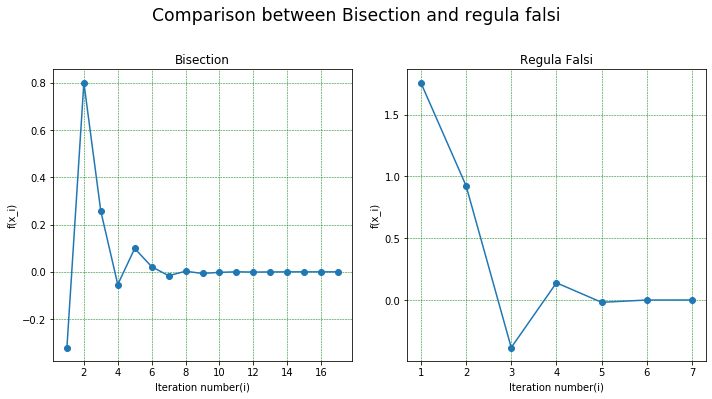

In [6]:
fig,ax=plt.subplots(2,1,figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x_B,y_B,"o-")
plt.xlabel('Iteration number(i)')
plt.ylabel('f(x_i)')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title("Bisection")
#plt.show()
plt.subplot(1,2,2)
plt.plot(x_rf,y_rf,"o-")
plt.xlabel('Iteration number(i)')
plt.ylabel('f(x_i)')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title("Regula Falsi")
plt.suptitle("Comparison between Bisection and regula falsi",fontsize='xx-large',y=1.1)
fig.tight_layout()
plt.show()

In [7]:
z_regula=["_" for i in range(len(x_B))]
for i in range(len(z_rf)):
    z_regula[i]=z_rf[i]
#print(z_regula)
data3=[[x_B[i],z_B[i],z_regula[i]] for i in range(len(x_B))]
column_labels3=["i", "x in bisection", "x in regula falsi"]
print("Table for comparison between Bisection & Regula Falsi method is:")
MakeTable("Table for comparison between Bisection & Regula Falsi.csv" ,column_labels3,data3)

Table for comparison between Bisection & Regula Falsi method is:
    x in bisection   x in regula falsi
i                                     
1         2.800000  4.5366949903637295
2         2.200000   1.860571973955578
3         2.500000  2.8451818758151077
4         2.650000   2.555848958936929
5         2.575000   2.632556584478517
6         2.612500  2.6233332805806144
7         2.631250  2.6231441302256915
8         2.621875                   _
9         2.626562                   _
10        2.624219                   _
11        2.623047                   _
12        2.623633                   _
13        2.623340                   _
14        2.623193                   _
15        2.623120                   _
16        2.623157                   _
17        2.623138                   _


## Question 2.
Make appropriate initial guesses (same interval for Bisection and Regula-falsi) and solve the following equation,

−x − cos x = 0

Use all three methods Bisection, Regula-falsi and Newton-Raphson to solve it. For Newton-Raphson, use x=0.0 as initial guess. Compare all three methods to achieve the same accuracy as above in Q1.

In [8]:
def functionN(x):
    return(-x-math.cos(x))
tol=10**(-5)
rootN,x_N,y_N=NR(functionN,0.0,0.0001,tol)
z_N=[(i+1) for i in range(len(x_N))]

In [9]:
print("Newton Raphson method gives root "+str(Round(rootN,5))+" .")
x_root,x_B,y_B,z_B = Bisection(functionN,-1,0, tolerance)
y_root = functionN(x_root)
print("Bisection method gives root "+str(Round(x_root,5))+" .")
x_rf_root,x_rf,z_rf,y_rf = RegulaFalsi(functionN,-1,0, tolerance)
y_rf_root = functionN(x_root)
print("Regula falsi gives root "+str(Round(x_rf_root,5))+" .")

Newton Raphson method gives root -0.73909 .
Bisection method gives root -0.73909 .
Regula falsi gives root -0.73908 .


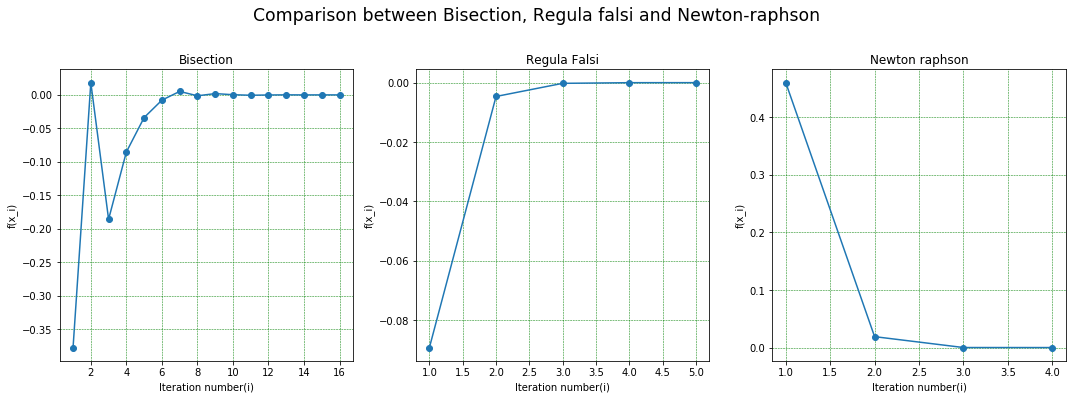

In [10]:
fig,ax=plt.subplots(3,1,figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(x_B,y_B,"o-")
plt.xlabel('Iteration number(i)')
plt.ylabel('f(x_i)')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title("Bisection")
#plt.show()
plt.subplot(1,3,2)
plt.plot(x_rf,y_rf,"o-")
plt.xlabel('Iteration number(i)')
plt.ylabel('f(x_i)')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title("Regula Falsi")
plt.subplot(1,3,3)
plt.plot(z_N,y_N,"o-")
plt.xlabel('Iteration number(i)')
plt.ylabel('f(x_i)')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title("Newton raphson")
plt.suptitle("Comparison between Bisection, Regula falsi and Newton-raphson",fontsize='xx-large',y=1.1)
fig.tight_layout()
plt.show()

In [11]:
z_regula=["_" for i in range(len(x_B))]
z_newton=["_" for i in range(len(x_B))]
for i in range(len(z_rf)):
    z_regula[i]=z_rf[i]
for j in range(len(x_N)):
    z_newton[j]=x_N[j]
#print(z_regula)
data4=[[x_B[i],z_B[i],z_regula[i],z_newton[i]] for i in range(len(x_B))]
column_labels4=["i", "x in bisection", "x in regula falsi","x in newton raphson"]
print("Table for comparison between Bisection, Regula Falsi and Newton Raphson method is:")
MakeTable("Table for comparison between Bisection & Regula Falsi and Newton-Raphson.csv" ,column_labels4,data4)

Table for comparison between Bisection, Regula Falsi and Newton Raphson method is:
    x in bisection    x in regula falsi  x in newton raphson
i                                                           
1        -0.500000  -0.6850733573260451  -1.0000500024999313
2        -0.750000   -0.736298997613654  -0.7503638676089563
3        -0.625000  -0.7389453559657132  -0.7391126462513903
4        -0.687500  -0.7390781308800257  -0.7390851327747899
5        -0.718750  -0.7390847824489231                    _
6        -0.734375                    _                    _
7        -0.742188                    _                    _
8        -0.738281                    _                    _
9        -0.740234                    _                    _
10       -0.739258                    _                    _
11       -0.738770                    _                    _
12       -0.739014                    _                    _
13       -0.739136                    _                    _
14

## Question 3
Find the roots (all real) of the following polynomial using the Laguerre’s and synthetic division method,
P(x) = x^4 − 5x^2 + 4

In [12]:
dx=0.0001
tol=10**(-5)
k=1000
Y=[1,0,-5,0,4]
SyntheticDivisionresult(Y,k,tol)

The 1th reminder is 0.0
The 2th reminder is 0.0
The 3th reminder is 0.0
The 4th reminder is 0.0
Deflated polinomial is (x-(1.0))(x-(-1.0))(x-(2.0))(x-(-2.0))
So the roots are [1.0, -1.0, 2.0, -2.0]
